In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import re

In [3]:
def extract_data_to_df(log_content):
    pattern = (
        r"L1 Cache Size: (\d+) KB, L2 Cache Size: (\d+) KB, Line Size: (\d+) Bytes\n"
        r"L1 Hits: (\d+), L1 Misses: (\d+), L2 Hits: (\d+), L2 Misses: (\d+)\n"
        r"L1 Hit Rate: ([\d\.]+), L2 Hit Rate: ([\d\.]+)\n"
        r"total_time: (\d+) cycles"
    )
    extracted_rows = re.findall(pattern, log_content)
    
    columns = ['L1 Cache Size', 'L2 Cache Size', 'Line Size', 'L1 Hits', 'L1 Misses', 
               'L2 Hits', 'L2 Misses', 'L1 Hit Rate', 'L2 Hit Rate', 'Total Time']
    df = pd.DataFrame(extracted_rows, columns=columns)
    df[columns] = df[columns].apply(pd.to_numeric)

    return df

l2_cache_sizes = [512, 1024, 2048]
l1_cache_sizes = [32, 64]

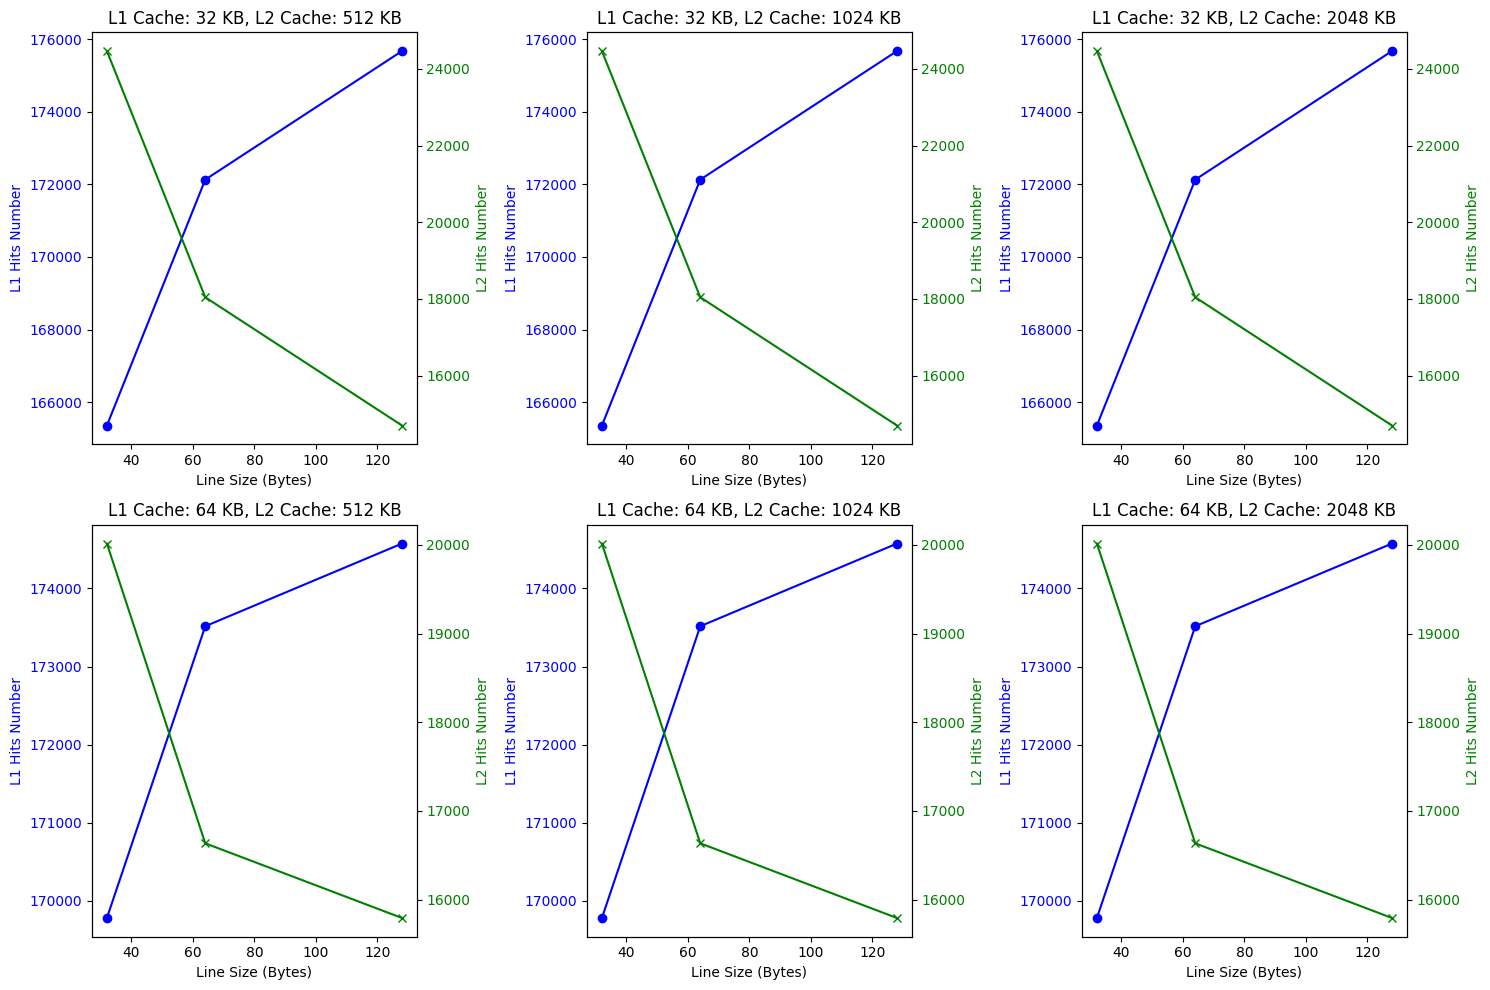

In [22]:
file_path = './case2lru.log'

with open(file_path, 'r') as file:
    log_content = file.read()

df = extract_data_to_df(log_content)

fig, axs = plt.subplots(len(l1_cache_sizes), len(l2_cache_sizes), figsize=(15, 10))

for i, l1_cache_size in enumerate(l1_cache_sizes):
    for j, l2_cache_size in enumerate(l2_cache_sizes):
        df_filtered = df[(df['L2 Cache Size'] == l2_cache_size) & (df['L1 Cache Size'] == l1_cache_size)]

        if not df_filtered.empty:
            # Creating a secondary y-axis for L2 Hits
            ax2 = axs[i, j].twinx()

            # Plotting L1 Hits on the original y-axis
            axs[i, j].plot(df_filtered['Line Size'], df_filtered['L1 Hits'], marker='o', linestyle='-', color='blue', label='L1 Hits')
            axs[i, j].set_ylabel('L1 Hits Number', color='blue')

            # Plotting L2 Hits on the secondary y-axis
            ax2.plot(df_filtered['Line Size'], df_filtered['L2 Hits'], marker='x', linestyle='-', color='green', label='L2 Hits')
            ax2.set_ylabel('L2 Hits Number', color='green')

            axs[i, j].set_title(f'L1 Cache: {l1_cache_size} KB, L2 Cache: {l2_cache_size} KB')
            axs[i, j].set_xlabel('Line Size (Bytes)')
            axs[i, j].tick_params(axis='y', labelcolor='blue')
            ax2.tick_params(axis='y', labelcolor='green')

plt.tight_layout()
plt.show()


From the figure above, We can find that when use LRU algorithm, line size increase, the L1 hit number increase.

When we use LRU algorithm, no matter line size, L2 cache size, L1 cache size,  the L1 and L2 hit number has no much difference.

L1 miss number is total number - L1 hit number, so we don't plot L1 miss number in figures.


# Random


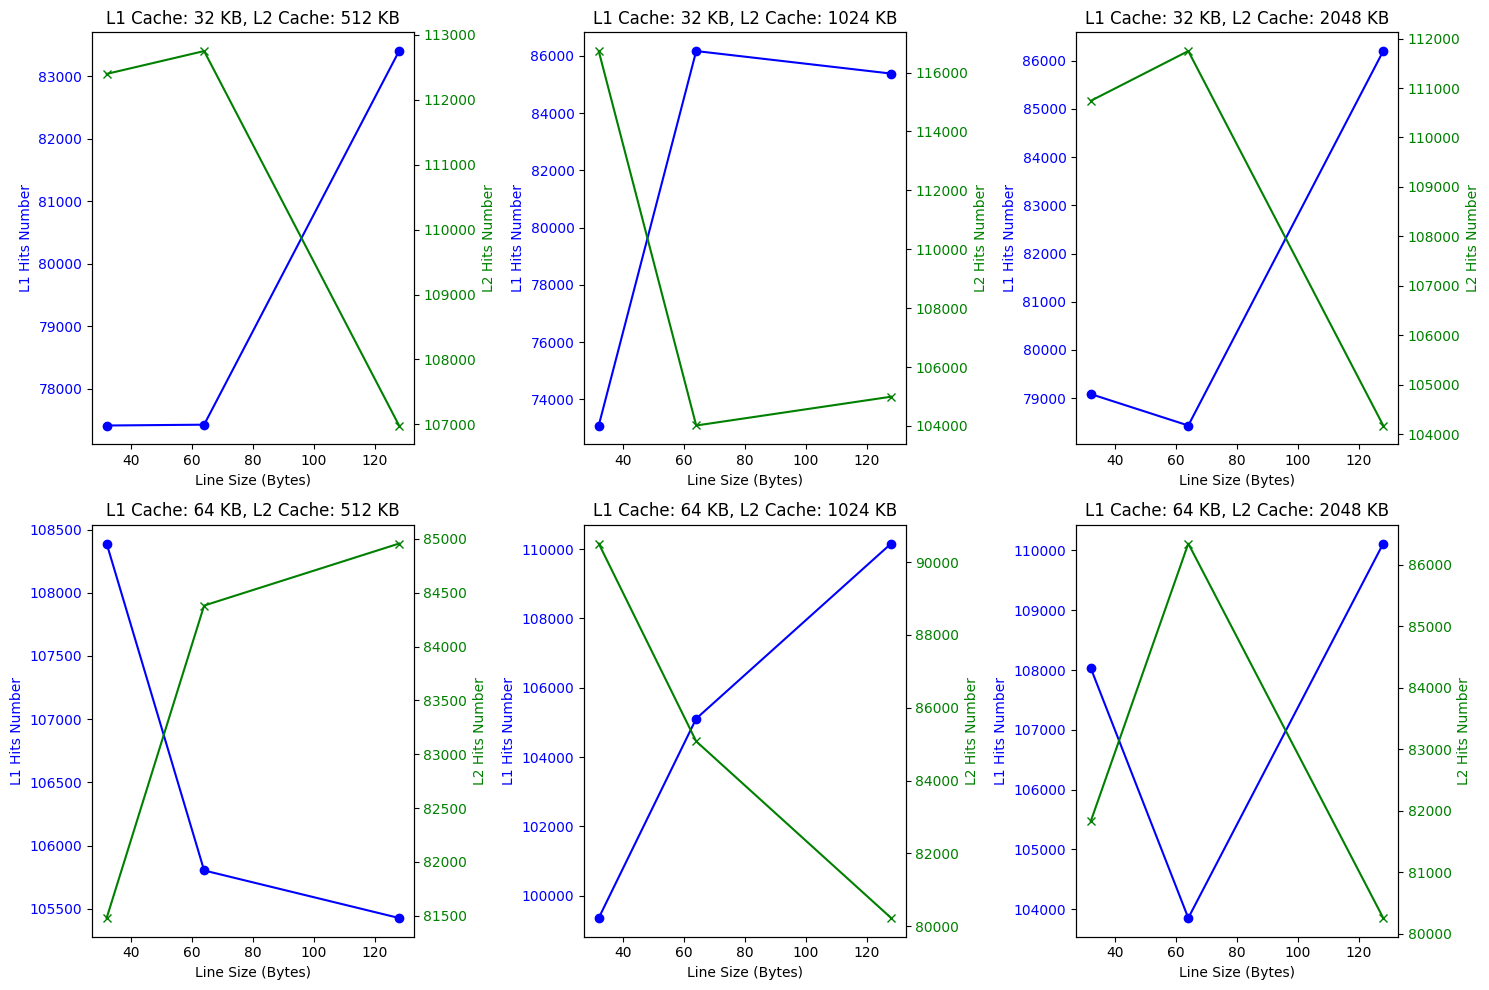

In [24]:
file_path = './case2random.log'
with open(file_path, 'r') as file:
    log_content = file.read()

df = extract_data_to_df(log_content)

fig, axs = plt.subplots(len(l1_cache_sizes), len(l2_cache_sizes), figsize=(15, 10))

for i, l1_cache_size in enumerate(l1_cache_sizes):
    for j, l2_cache_size in enumerate(l2_cache_sizes):
        df_filtered = df[(df['L2 Cache Size'] == l2_cache_size) & (df['L1 Cache Size'] == l1_cache_size)]

        if not df_filtered.empty:
            # Creating a secondary y-axis for L2 Hits
            ax2 = axs[i, j].twinx()

            # Plotting L1 Hits on the original y-axis
            axs[i, j].plot(df_filtered['Line Size'], df_filtered['L1 Hits'], marker='o', linestyle='-', color='blue', label='L1 Hits')
            axs[i, j].set_ylabel('L1 Hits Number', color='blue')

            # Plotting L2 Hits on the secondary y-axis
            ax2.plot(df_filtered['Line Size'], df_filtered['L2 Hits'], marker='x', linestyle='-', color='green', label='L2 Hits')
            ax2.set_ylabel('L2 Hits Number', color='green')

            axs[i, j].set_title(f'L1 Cache: {l1_cache_size} KB, L2 Cache: {l2_cache_size} KB')
            axs[i, j].set_xlabel('Line Size (Bytes)')
            axs[i, j].tick_params(axis='y', labelcolor='blue')
            ax2.tick_params(axis='y', labelcolor='green')

plt.tight_layout()
plt.show()



For Random algorithm We can find in the figure  above, 

When line size increase, the L1 and L2 hit number may increase or decrease, it depends.

When we increase L1 cache size, the L1 hit number increase, L2 hit number decrease.

When we increase L2 cache size, the L1 hit number increase, L2 hit number is not necessarily increase.

When we choose L1 cache size = 64KB, line size = 128Bytes, L2 cache size = 1MB or 2MB, we can get the best L1 hit rate.

# FIFO

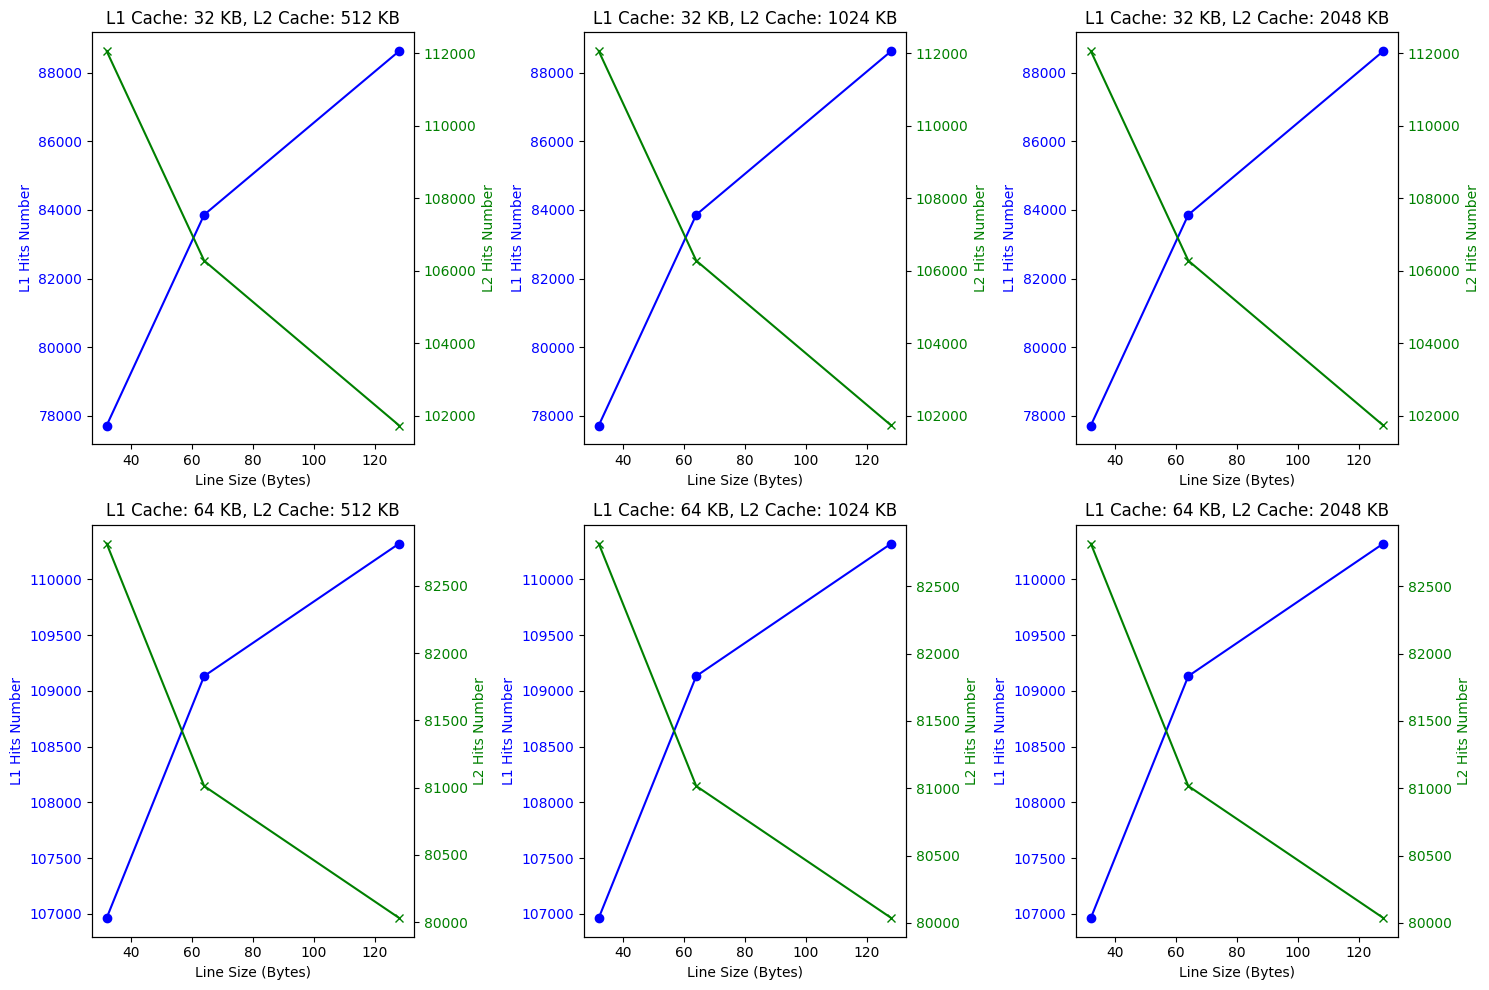

In [5]:
file_path = './case2fifo.log'
with open(file_path, 'r') as file:
    log_content = file.read()

df = extract_data_to_df(log_content)

fig, axs = plt.subplots(len(l1_cache_sizes), len(l2_cache_sizes), figsize=(15, 10))

for i, l1_cache_size in enumerate(l1_cache_sizes):
    for j, l2_cache_size in enumerate(l2_cache_sizes):
        df_filtered = df[(df['L2 Cache Size'] == l2_cache_size) & (df['L1 Cache Size'] == l1_cache_size)]

        if not df_filtered.empty:
            # Creating a secondary y-axis for L2 Hits
            ax2 = axs[i, j].twinx()

            # Plotting L1 Hits on the original y-axis
            axs[i, j].plot(df_filtered['Line Size'], df_filtered['L1 Hits'], marker='o', linestyle='-', color='blue', label='L1 Hits')
            axs[i, j].set_ylabel('L1 Hits Number', color='blue')

            # Plotting L2 Hits on the secondary y-axis
            ax2.plot(df_filtered['Line Size'], df_filtered['L2 Hits'], marker='x', linestyle='-', color='green', label='L2 Hits')
            ax2.set_ylabel('L2 Hits Number', color='green')

            axs[i, j].set_title(f'L1 Cache: {l1_cache_size} KB, L2 Cache: {l2_cache_size} KB')
            axs[i, j].set_xlabel('Line Size (Bytes)')
            axs[i, j].tick_params(axis='y', labelcolor='blue')
            ax2.tick_params(axis='y', labelcolor='green')

plt.tight_layout()
plt.show() 

From the figure above, We can find that when use FIFO algorithm, 

1. the L1 hit number increase factor: line size increase, L1 cache size increase.

# Compare LRU, FIFO, Random

For L1 hit number: LRU algorithm has much higher number. FIFO and random algorithm are similar.